# Data Cleaning and Transformation Test

Use file `./ref/sample_user_data.csv` for input

Use `pandas` lib or other lib if you want

Write your code and display the result in specific cell

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read csv file

df = pd.read_csv("./ref/sample_user_data.csv")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    29 non-null     int64  
 1   name       29 non-null     object 
 2   age        26 non-null     float64
 3   join_date  27 non-null     object 
 4   salary     29 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.3+ KB


,user_id,name,age,join_date,salary
0,1,John,28.0,2023-02-01,50000
1,2,Alice,NaN,2023-02-02,52000
2,3,Bob,34.0,02/03/2023,49000
3,3,Bob,34.0,2023-03-02,49000
4,4,Emma,45.0,NaN,47000
5,5,Grek,32.0,NaN,23000.32
6,6,allen,26.0,2023-09-23,30000
7,7,Allen,26.0,2023-09-23,30000
8,8,chris,28.0,2020-11-13,"35,000.25"
9,9,Bob,33.0,2023-04-02,49000


### Question 1
There're data quality issues, such as outliers, null values, and incorrect data types.  

1. Validate fields.
2. Clean data by handling missing values.
3. Deduplicate record (if any).
4. Standardize any inconsistent data (e.g., date formats).


There're several conditions,
1.  Replace NaN in age value with "-"
2.  Format join_date to date type.
    -   YYYY-MM-DD i.e. 2024-11-03
    -   DD/MM/YYYY i.e. 03/12/2023
    -   remove NaN value
3. Name should be captitalized.



#### Example Data Quality Checks:
- Identify outliers in numerical fields (e.g., ages > 100).
- Ensure no future dates in a date column.
- user_id not be empty




In [3]:
# Write you code and display question 1 result here.
df.columns

Index(['user_id', 'name', 'age', 'join_date', 'salary'], dtype='object')

In [4]:
df.describe()

,user_id,age
count,29.000000,26.000000
mean,12.206897,74.115385
std,7.379408,177.838427
min,1.000000,22.000000
25%,6.000000,33.000000
50%,12.000000,34.000000
75%,18.000000,39.000000
max,25.000000,940.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    29 non-null     int64  
 1   name       29 non-null     object 
 2   age        26 non-null     float64
 3   join_date  27 non-null     object 
 4   salary     29 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.3+ KB


In [6]:
duplicated_rows = df[df.duplicated()]

if not duplicated_rows.empty:
    print(f"There are {len(duplicated_rows)} duplicated rows.")
else:
    print("No duplicated rows found.")

There are 5 duplicated rows.


In [7]:
df = df.drop_duplicates(keep='first')

Standardize "name"

In [8]:
df.name.unique()

array(['John', 'Alice', 'Bob', 'Emma', 'Grek', 'allen', 'Allen', 'chris',
       'Bobb', 'Bobby', 'Bab', 'Toby', 'Eggy', 'BOB', 'muller', 'MIke',
       'Vin', 'Gin', 'james'], dtype=object)

In [9]:
names = df['name']
formatted_names = []

for name in names:
    name_formatted = name.lower().capitalize()
    formatted_names.append(name_formatted)

df.loc[:, 'name'] = formatted_names

In [10]:
df.name.unique()

array(['John', 'Alice', 'Bob', 'Emma', 'Grek', 'Allen', 'Chris', 'Bobb',
       'Bobby', 'Bab', 'Toby', 'Eggy', 'Muller', 'Mike', 'Vin', 'Gin',
       'James'], dtype=object)

join_date format

In [11]:
df.join_date.unique()

array(['2023-02-01', '2023-02-02', '02/03/2023', '2023-03-02', nan,
       '2023-09-23', '2020-11-13', '2023-04-02', '2023-03-01',
       '2024-03-02', '2023-12-16', '2023-04-15', '2022-03-15',
       '2223-03-02', '2003-03-02', '2043-03-02'], dtype=object)

In [12]:
def identify_format(date):
    if pd.isna(date):
        return "NaN"
    elif isinstance(date, str):
        if '-' in date and len(date.split('-')[0]) == 4:
            return "YYYY-MM-DD"
        elif '/' in date and len(date.split('/')[-1]) == 4:
            return "DD/MM/YYYY"
    return "Other"

df.loc[:, 'join_date_format'] = df['join_date'].apply(identify_format)

format_counts = df['join_date_format'].value_counts()

print("Unique join_date formats:")
print(format_counts)

Unique join_date formats:
join_date_format
YYYY-MM-DD    21
NaN            2
DD/MM/YYYY     1
Name: count, dtype: int64


In [13]:
# change DD/MM/YYYY to YYYY-MM-DD
def convert_to_iso_format(date):
    if isinstance(date, str) and '/' in date and len(date.split('/')[-1]) == 4:
        try:
            day, month, year = date.split('/')
            return f"{year}-{month.zfill(2)}-{day.zfill(2)}"
        except ValueError:
            return date
    return date

df.loc[:, 'join_date'] = df['join_date'].apply(convert_to_iso_format)

print(df['join_date'])

0     2023-02-01
1     2023-02-02
2     2023-03-02
3     2023-03-02
4            NaN
5            NaN
6     2023-09-23
7     2023-09-23
8     2020-11-13
9     2023-04-02
10    2023-03-01
12    2023-03-01
13    2023-02-02
15    2024-03-02
16    2023-03-02
17    2023-12-16
19    2023-03-02
22    2023-04-02
23    2023-04-15
24    2022-03-15
25    2023-03-02
26    2223-03-02
27    2003-03-02
28    2043-03-02
Name: join_date, dtype: object


In [14]:
df.join_date.unique()

array(['2023-02-01', '2023-02-02', '2023-03-02', nan, '2023-09-23',
       '2020-11-13', '2023-04-02', '2023-03-01', '2024-03-02',
       '2023-12-16', '2023-04-15', '2022-03-15', '2223-03-02',
       '2003-03-02', '2043-03-02'], dtype=object)

In [15]:
df['join_date'] = df['join_date'].replace({'2043-03-02': '2023-03-02', '2223-03-02': '2023-03-02'})

In [16]:
df.join_date.unique()

array(['2023-02-01', '2023-02-02', '2023-03-02', nan, '2023-09-23',
       '2020-11-13', '2023-04-02', '2023-03-01', '2024-03-02',
       '2023-12-16', '2023-04-15', '2022-03-15', '2003-03-02'],
      dtype=object)

In [17]:
# for NaN join_date, we have to check if there are same "name" and same "age" appeared in df
## if any, replaced NaN with that join_date. but now there are not...

### since most people have join_date in about 2023 Q1, we impute NaN by 2023-02-15 (middle of Q1)
df.loc[df['join_date'].isna(), 'join_date'] = '2023-02-15'

In [18]:
df.drop('join_date_format', axis=1, inplace=True)

Handling Age

In [ ]:
# Handle NaN values in the 'age' column
## since we still have duplicated rows, we handled NaN age by
## for each row that has NaN age, if there are row that shared same user_id, join_date, or salary -> we assume that they are same people -> replace NaN age with known age

def handle_nan_age(row):
    if pd.isna(row['age']):
        same_name_rows = df[df['name'] == row['name']]

        match = same_name_rows[
            (same_name_rows['join_date'] == row['join_date']) |
            (same_name_rows['user_id'] == row['user_id']) |
            (same_name_rows['salary'] == row['salary'])
        ]
        
        if not match.empty:
            matched_age = match['age'].dropna()
            if not matched_age.empty:
                return matched_age.iloc[0]
        
        return df['age'].median()
    else:
        return row['age']


df['age'] = df.apply(handle_nan_age, axis=1)

In [20]:
# replace outlier age with med age
median_age = df['age'].median()

# Define reasonable age range
valid_age_range = (15, 100)

df.loc[~df['age'].between(*valid_age_range), 'age'] = median_age

print(df['age'].describe())
print("Unique ages after handling:", df['age'].unique())

count    24.000000
mean     35.291667
std       8.332645
min      22.000000
25%      32.750000
50%      34.000000
75%      36.750000
max      60.000000
Name: age, dtype: float64
Unique ages after handling: [28. 34. 45. 32. 26. 33. 39. 36. 22. 54. 40. 60.]


Handle salary

In [21]:
# format
df['salary'] = pd.to_numeric(df['salary'].replace(',', '', regex=True), errors='coerce')
df['salary'] = df['salary'].round(2)

In [22]:
df = df.drop_duplicates(keep='first')

In [24]:
# typically we need to analyse if there are same person in data such as | is Bob is all "Bob" or they are diff person | Bob ? Bobb? Bobby? Bab(typo?)?
## instances that have same values should consider as same person, but in this context, I intended to keep them since we may have to use "user_id" data in further analyse 

In [31]:
Q1_df = df

In [33]:
print(Q1_df)

    user_id    name   age  join_date     salary
0         1    John  28.0 2023-02-01   50000.00
1         2   Alice  34.0 2023-02-02   52000.00
2         3     Bob  34.0 2023-03-02   49000.00
4         4    Emma  45.0 2023-02-15   47000.00
5         5    Grek  32.0 2023-02-15   23000.32
6         6   Allen  26.0 2023-09-23   30000.00
7         7   Allen  26.0 2023-09-23   30000.00
8         8   Chris  28.0 2020-11-13   35000.25
9         9     Bob  33.0 2023-04-02   49000.00
10       10    Bobb  34.0 2023-03-01   49000.00
12       12   Bobby  34.0 2023-03-01   49000.00
13       13     Bab  39.0 2023-02-02   49000.00
15       15     Bob  39.0 2024-03-02   69000.00
16       16    Toby  34.0 2023-03-02   49000.00
17       17    Eggy  36.0 2023-12-16   58000.00
19       18    Emma  22.0 2023-03-02   22000.00
22       19     Bob  33.0 2023-04-02  100000.00
23       20  Muller  34.0 2023-04-15  100000.00
24       21    Mike  54.0 2022-03-15  120000.00
25       22    Toby  34.0 2023-03-02  14

### Question 2
From question 1, display summary statistics on specific columns (mean, median, max, min, average)


In [25]:
# Write you code and display question 2 result here.
columns_to_summarize = ['age', 'salary']
summary_stats = df[columns_to_summarize].agg(['mean', 'median', 'max', 'min'])

print(summary_stats)

              age         salary
mean    35.347826   71521.763913
median  34.000000   49000.000000
max     60.000000  169000.000000
min     22.000000   22000.000000


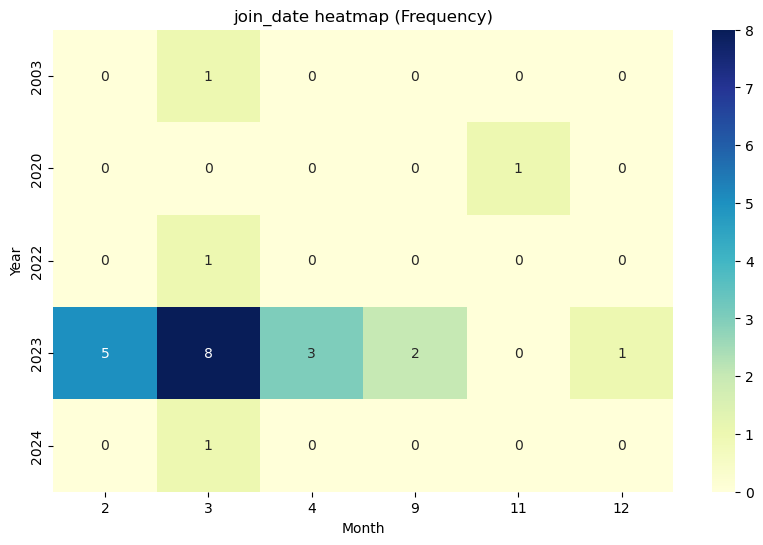

In [26]:
df['join_date'] = pd.to_datetime(df['join_date'], errors='coerce')

df['year'] = df['join_date'].dt.year
df['month'] = df['join_date'].dt.month

heatmap_data = df.pivot_table(index='year', columns='month', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title('join_date heatmap (Frequency)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


In [27]:
df

,user_id,name,age,join_date,salary,year,month
0,1,John,28.0,2023-02-01,50000.00,2023,2
1,2,Alice,34.0,2023-02-02,52000.00,2023,2
2,3,Bob,34.0,2023-03-02,49000.00,2023,3
4,4,Emma,45.0,2023-02-15,47000.00,2023,2
5,5,Grek,32.0,2023-02-15,23000.32,2023,2
6,6,Allen,26.0,2023-09-23,30000.00,2023,9
7,7,Allen,26.0,2023-09-23,30000.00,2023,9
8,8,Chris,28.0,2020-11-13,35000.25,2020,11
9,9,Bob,33.0,2023-04-02,49000.00,2023,4
10,10,Bobb,34.0,2023-03-01,49000.00,2023,3


In [28]:
df.drop(['year', 'month'], axis = 1, inplace=True)

### Question 3
Display user record who has filled all data (data not be NaN, empty or "-")



In [29]:
# Write you code and display question 3 result here.
filled_records = df[(~df.isna().any(axis=1)) & (~df.isin(['', '-']).any(axis=1))]

print(filled_records)

    user_id    name   age  join_date     salary
0         1    John  28.0 2023-02-01   50000.00
1         2   Alice  34.0 2023-02-02   52000.00
2         3     Bob  34.0 2023-03-02   49000.00
4         4    Emma  45.0 2023-02-15   47000.00
5         5    Grek  32.0 2023-02-15   23000.32
6         6   Allen  26.0 2023-09-23   30000.00
7         7   Allen  26.0 2023-09-23   30000.00
8         8   Chris  28.0 2020-11-13   35000.25
9         9     Bob  33.0 2023-04-02   49000.00
10       10    Bobb  34.0 2023-03-01   49000.00
12       12   Bobby  34.0 2023-03-01   49000.00
13       13     Bab  39.0 2023-02-02   49000.00
15       15     Bob  39.0 2024-03-02   69000.00
16       16    Toby  34.0 2023-03-02   49000.00
17       17    Eggy  36.0 2023-12-16   58000.00
19       18    Emma  22.0 2023-03-02   22000.00
22       19     Bob  33.0 2023-04-02  100000.00
23       20  Muller  34.0 2023-04-15  100000.00
24       21    Mike  54.0 2022-03-15  120000.00
25       22    Toby  34.0 2023-03-02  14

In [30]:
# since we imputed all NaN values, filled_records is the same as tranformed df
all(filled_records == df)

True